# <center> Fast Fourier Transform

In this notebook, we will be looking at the Fast Fourier Transform (FFT) algorithm. 

## Fast Fourier Transform (FFT)


Before we begin to explore the FFT, let's first go over a few terms that will be useful to know as we go through this notebook. 
- Amplitude 
- Frequency Domain? 
- Waveform
- Fourier Series

<br>

## What Is The FFT & Why Are We Performing It?

- why we need the FFT 
    - Converts to Frequency time series 
    - Breaks down the data we have to sine and cosine functions (the addition of them result in our original data)

The Fast Fourier Transform (FFT) is a powerful tool used for analyzing signals. It works by testing for each frequency component in the data. 

We are going to transform our acceleration data that was measured from the accelerometers on top of the Campanile. Right now, all we have is our acceleration measurements-- it's hard to draw conclusions from just these numbers. We need to transform our X, Y, and Z acceleration measurements with the FFT in order to convert it to Frequency time series which will allow us to draw conclusions. This will break down the data we have into unique combinations of sine and cosine functions that represent our original data as frequencies. Note that when these cosine and sine functions are added together, it results in our original acceleration data. 

We are using the FFT to transform our data to analyze these specific frequencies. But, why do we want frequencies? These frequencies are associated with deformation modes of buildings. In our case, we are looking at the different deformation modes of the Campanile itself. Looking at the lowest frequency helps us understand what the lowest frequency needed is to be excited. 

### Fast Fourier Transform Example

#### Importing Dependencies

In [ ]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Background Information

First, we will be investigating the graph of the equation **y = a sin (bx + c)** using different values for **a**, **b**, and **c**.<br>

In the above **y** equation,<br>
**a** is the **amplitude of the sine curve**<br>
**b** is the **period of the sine curve**<br>
**c** is the **phase shift** of the sine curve <br>

We will only work with **a**, the **amplitude of the sine curve**, and **b**, the **period of the sine curve**

#### What is the amplitude of a sine curve?

The amplitude of a sine curve is its height.

#### What is the period of the sine curve?

The period of the sine curve is the length of one cycle of the curve. The natural period of the sine curve is **2π**. <br>

So, a coefficient of **b=1** is equivalent to a period of **2π**.  To get the period of the sine curve for any coefficient **b**, just **divide 2π by the coefficient b to get the new period of the curve**. 

The coefficient b and the period of the sine curve have an inverse relationship, so as b gets smaller, the length of one cycle of the curve gets bigger.  Likewise, as you increase b, the period will decrease.

#### Creating Two Sin Waves (Y1 and Y2)

y1 has a **b** of 20π, conseqently the period  **T1** of that sine curve is 2π/20π = **0.1**. <br>
y2 has a **b** of 6π, conseqently the period  **T2** of that sine curve is 2π/6π = **0.3333**. <br>
<br>
The functions y1 and y2 have the following equation: <br>
**y1 = 1/2 sin (20pi*x)** <br>
**y2 = 2 sin (6pi*x)**<br>

From above, we also notice the following: <br>
y1 has an **a (amplitude)** of **0.5**. <br>
y2 has an **a (amplitude)** of **2** <br>


 <center> ****Please Remember those established values as we will refer back to them ***** </center>


In [ ]:
# NUMBER OF SAMPLE POINTS: This is the number of points recorded
N = 800
# SAMPLE SPACING : The time span at which we record each of those points
T = 1.0 / 800.0

# X-axis spacing
x = np.linspace(0.0, N*T, N, endpoint=False)

# First Y1 values : Sin function of amplitude 1/2 and period T = 20pi
y1 = (1/2)*np.sin(20*np.pi*x)

# First Y2 values : Sin function of amplitude 1 and period T = 6pi

y2= 2*np.sin(6*np.pi*x)

#### Plotting Y1

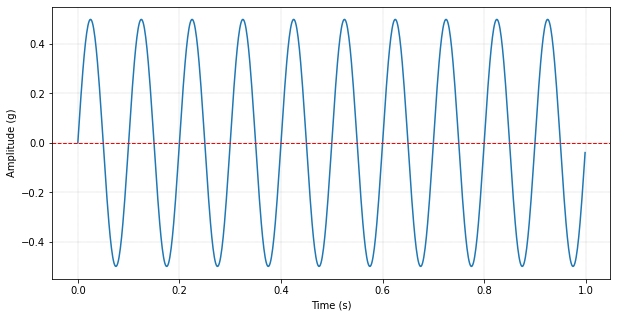

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.axhline(linewidth=1, color='r',linestyle='--')
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')

#### Plotting Y2

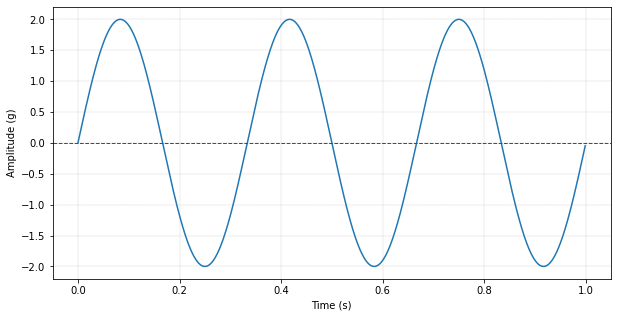

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, y2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.axhline(linewidth=1, color='r',linestyle='--')
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')

#### Creating a new Y3 by combining Y1+Y2

Let us consider Y3 as an acceleration record made of sin functions from y1 and y2. Obviously this is an over simplified response, but for example puposes, this helps in understand what the FFT does. 

We know that: <br>
**y1 = 1/2 sin (20pi*x)** <br>
**y2 = 2 sin (6pi*x)** <br>

Then we set up y3 as **y3 = y1 + y2**. <br>

Consequently, we have **y3 = 1/2 sin (20pi*x) + 2 sin (6pi*x)**


#### Plotting Y3

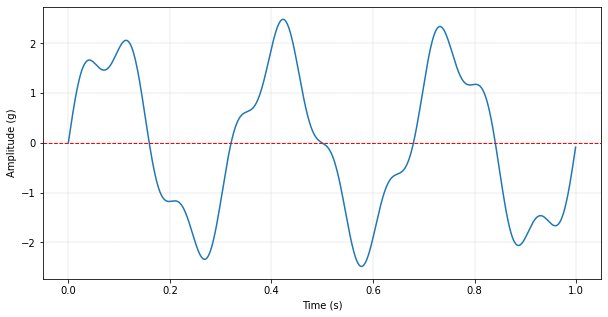

In [ ]:
# We create Y3 by adding Y1 and Y2
y3 = y1+y2
# We plot it
plt.figure(figsize=(10, 5))
plt.plot(x, y3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (g)')
plt.axhline(linewidth=1, color='r',linestyle='--')
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')

#### Getting the Frequencies using the Fast Fourier Transform

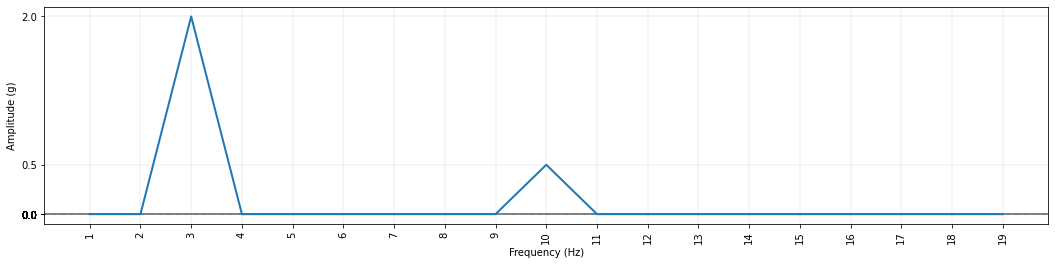

In [ ]:
plt.figure(figsize=(18, 4))
yf = fft(y3)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf[1:20], 2.0/N * np.abs(yf[0:N//2])[1:20],linewidth='2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (g)')
plt.xticks(xf[1:20],rotation = 90)
plt.yticks(np.round(2.0/N * np.abs(yf[0:N//2])[1:20],2))
plt.grid(which='minor',linestyle='-', linewidth='0.1', color='black')
plt.grid(which='major',linestyle='--', linewidth='0.1', color='black')
plt.show()

This show that the dominant frequencies in our acceleration records are the peaks we see in the picture above, that is **f1= 3 Hz** and **f2= 10 Hz**. <br> Those are what we are concerned about as those frequencies might be related to how the structure deforms.

#### How do we know we are correct and the FFT is a powerful tool for ever complex record of accelerations?

**Comment 1:** We know that period (T) is inversely proportional to freqency(f). That is **T = 1/f**<br> So:<br>**T1** = 1/f1 = 1/ 3 = **0.333**. <br> **T2** = 1/f2 = 1/10 = **0.1**.

**Comment 2**: Moreover, if we observe the **y** axis values, we can see that we have the amplitudes of **2** and **0.5** are well represented. Those correspond to the amplitude of the 2 sines functions we defined earlier!!

**Comment 3**: Notice how those values are exactly the same as the values we calculated previous. This is the power of FFT and why it is so important in our work. For complex ground acceleration recordings, we can create a freqeuncy spectrum that will only show us what are the dominating frequencies.

#### Extension of Time Signal

If you notive, we only plotted our acceleration signals for a period of **1sec**. Try plotting for a longer time signal. That is increase the number N. <br>

What you will notice are the followings: <br>

* The more sampling point, the better the resolution the frequency
* The longer the time window, we have a better resolution in the frequency range
* Helps better the spectrogram 



## Implementing FFT

#### Mathematical Approach

insert the matematical equations here

- Talk about how usually they would have to do these calculations by hand, but instead we can use a handy dandy python package → import packages (explain what they're for, etc.)
- Use FFT to transform the data set 
- Explain what the data means now

#### Python Librairies

**insert functions we use in order to do the FFT**

## SciPy --> Taken from intro --> incorporate into this section

SciPy (scientific python) is an open-source Python library used for scientific and technical computing. SciPy is a broad ecosystem and packages include NumPy, Matplotlib, and Pandas, all of which we have learned about, and now we will dive into the uses of the specific SciPy package. 



Run the following cell to import the SciPy package!

In [ ]:
import scipy

SciPy functions can be used to compute mathematical functions in an easy and efficient way. Some of SciPy's uses include polynomial interpolation, linear algebra, integration, and more. We will use SciPy in combination with other packages to manipulate our data and create useful visualizations.

### The Fast Fourier Transform in SciPy

SciPy's expansive amount of functions allows us to compute FFT and inverse FFT easily. See below on how to import functions from SciPy and use them.

In [ ]:
from scipy.fft import fft, ifft
x = np.array([1.05, 2.30, 1.10, -1.20, 1.59, 4.21])
x

array([ 1.05,  2.3 ,  1.1 , -1.2 ,  1.59,  4.21])

In [ ]:
y = fft(x)
y

array([ 9.05-0.j        ,  4.16+2.07846097j, -4.75+1.22975607j,
       -1.57-0.j        , -4.75-1.22975607j,  4.16-2.07846097j])

In [ ]:
z = ifft(y)
z

array([ 1.05+0.j,  2.3 +0.j,  1.1 +0.j, -1.2 +0.j,  1.59-0.j,  4.21+0.j])

#### FFT Implementation on Accelerometers DataSet

implementation of the fft on the dataset we have

## Spectrograms

### Spectrograms using SciPy --> Taken from Intro Notebook --> incorporate into this section 

In this notebook, we will learn how to graph a spectrogram using consecutive Fourier transforms using not only scipy, but also our understanding of FFT and matplotlib.


Read more about scipy documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html


In [ ]:
#Example taken from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

#Plot
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#### What is a Spectrogram?

**include the definition here**

A spectrogram is a visualization of the spectrum of frequencies of a signal over time. As such, spectrograms will give us a better understanding of sublte movements of the Campanile and how it changes over time.

**Maybe add photo of a spectrogram as an example & to break up text**

#### Python Libraries

talk about couple of libraries one can use to rpocess that

### Implementation

implement it to the accelerometer dataset


## Power Spectral Density

#### What is a Power Spectral Density?

**include the definition here**

A power spectral density (PSD) displays a plot of the distribution of power into frequency components that make up the signal. 

**Add Photo example**

#### Python Libraries

talk about couple of libraries one can use to rpocess that

### Implementation

implement it to the accelerometer dataset

# <CENTER> EXPLORATORY LEARNING</CENTER>

Do not worry about it for now.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ebd495-2227-475e-8d87-73e1af6a492b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>